<a href="https://colab.research.google.com/github/be325/GRS35306/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-11-51a1073a48e7>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  temp_df = pd.DataFrame({"Date": dates, "Station": row[0], "Depth": depths})


PDF files generated: river_depth_timeseries.pdf and measurement_stations_map.pdf


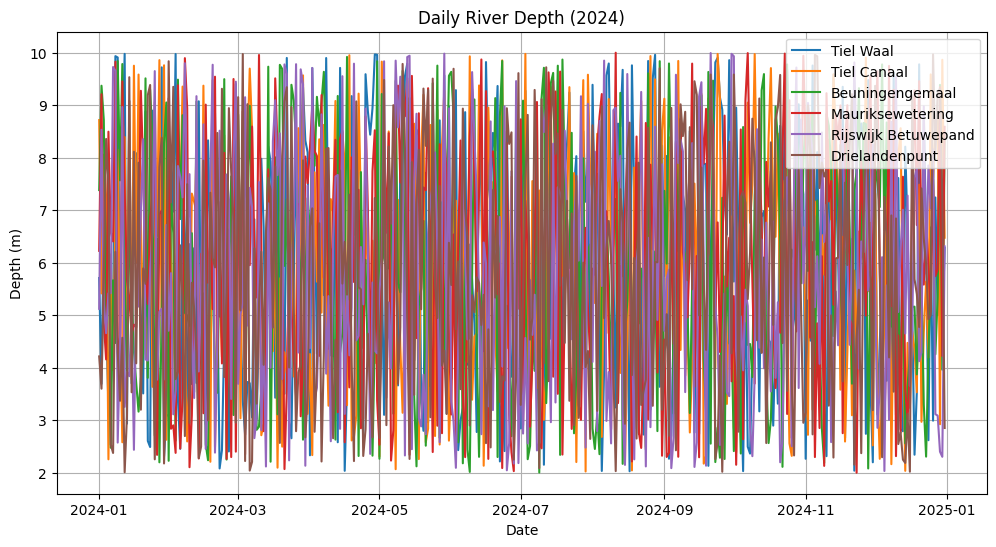

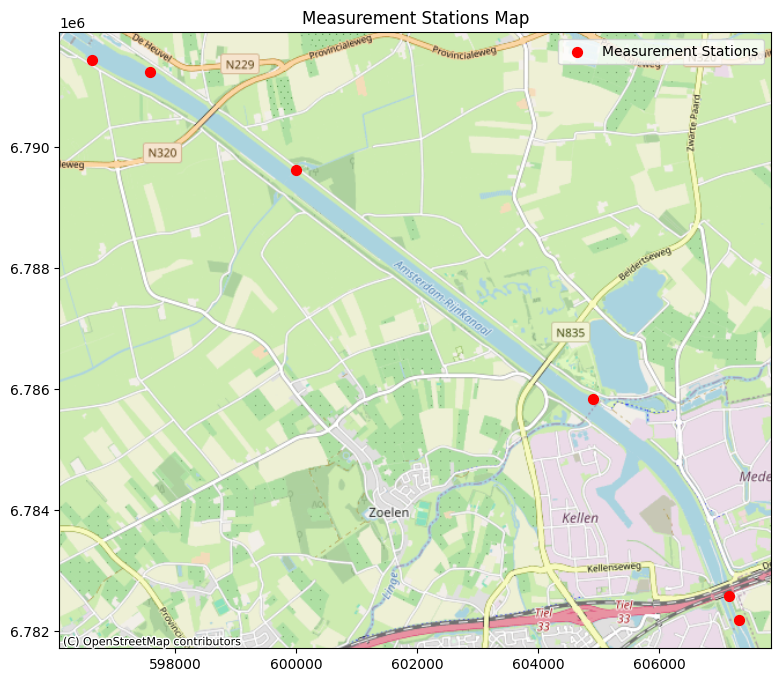

In [11]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx
from shapely.geometry import Point

# 1. Load the Excel file
file_path = "measurementstations.xlsx"
df = pd.read_excel(file_path)

# 2. Convert latitude and longitude from DMS (Degrees, Minutes, Seconds) to Decimal Degrees
def dms_to_decimal(dms):
    dms = dms.replace("°", " ").replace("'", " ").replace("\"", " ")
    parts = list(map(float, dms.split()))
    decimal = parts[0] + parts[1] / 60 + parts[2] / 3600
    return round(decimal, 6)

df["Latitude"] = df.iloc[:, 1].apply(lambda x: dms_to_decimal(x[:-1]) if "N" in x else -dms_to_decimal(x[:-1]))
df["Longitude"] = df.iloc[:, 2].apply(lambda x: dms_to_decimal(x[:-1]) if "E" in x else -dms_to_decimal(x[:-1]))

# 3. Generate simulated daily river depth data for 2024
dates = pd.date_range(start="2024-01-01", end="2024-12-31", freq="D")
depth_data = []
for _, row in df.iterrows():
    depths = np.random.uniform(2, 10, len(dates))  # Random depth values between 2m and 10m
    temp_df = pd.DataFrame({"Date": dates, "Station": row[0], "Depth": depths})
    depth_data.append(temp_df)

depth_df = pd.concat(depth_data)

# 4. Create a time-series visualization of river depth
plt.figure(figsize=(12, 6))
sns.lineplot(data=depth_df, x="Date", y="Depth", hue="Station", palette="tab10")
plt.title("Daily River Depth (2024)")
plt.xlabel("Date")
plt.ylabel("Depth (m)")
plt.legend(loc="upper right")
plt.grid(True)
plt.savefig("river_depth_timeseries.pdf", dpi=300, bbox_inches="tight")

# 5. Generate a spatial map of the measurement stations
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["Longitude"], df["Latitude"]), crs="EPSG:4326")
gdf = gdf.to_crs(epsg=3857)  # Convert to Web Mercator projection

fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(ax=ax, color="red", markersize=50, label="Measurement Stations")
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)
plt.legend()
plt.title("Measurement Stations Map")
plt.savefig("measurement_stations_map.pdf", dpi=300, bbox_inches="tight")

print("PDF files generated: river_depth_timeseries.pdf and measurement_stations_map.pdf")


In [2]:
pip install contextily


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 70.8 MB/s eta 0:00:00


In [9]:
from google.colab import files

# Upload file
uploaded = files.upload()

Saving measurementstations.xlsx to measurementstations.xlsx
